## Изучение датасета  
В данном блокноте будет вся информация о шагах.  


In [1]:
import pandas as pd

df = pd.read_csv('ah_step.csv')
df.head()

,id,timestamp,data_version,data_type,data,provider,user_id
0,applehealth_activity_steps_2261472_065994e97b5...,1704297546,2,applehealth_activity_steps,"[{""dataType"":""quantity"",""entryType"":""activity_...",applehealth,2261472
1,applehealth_activity_steps_2261472_d565ff4cfde...,1717525192,2,applehealth_activity_steps,"[{""dataType"":""quantity"",""entryType"":""activity_...",applehealth,2261472
2,applehealth_activity_steps_2261472_600c2ccda7b...,1730481905,2,applehealth_activity_steps,"[{""dataType"":""quantity"",""entryType"":""activity_...",applehealth,2261472
3,applehealth_activity_steps_2261472_49c6dcdd76d...,1725171352,2,applehealth_activity_steps,"[{""dataType"":""quantity"",""entryType"":""activity_...",applehealth,2261472
4,applehealth_activity_steps_2261472_d1a7e9c4d60...,1725653223,2,applehealth_activity_steps,"[{""dataType"":""quantity"",""entryType"":""activity_...",applehealth,2261472


In [2]:
import json

def flatten_dict(d, prefix=''):
    items = {}
    for key, value in d.items():
        if isinstance(value, dict):
            items.update(flatten_dict(value, key))
        else:
            items[key] = value
    return items


df['data'] = df['data'].apply(json.loads)

data_list=[]
for index, row in df.iterrows():
    data_list.append(flatten_dict(row['data'][0]))

df_from_json = pd.DataFrame(data_list)
df_from_json.head()

,dataType,entryType,health_kit_id,bundleIdentifier,hardwareVersion,manufacturer,model,name,operatingSystemVersion,productType,...,version,sourceGroup,sourceType,timeEnd,timeStart,unit,value,HKExternalUUID,HKMetadataKeySyncIdentifier,HKMetadataKeySyncVersion
0,quantity,activity_steps,49D29566-6524-4FDB-B1E9-98419D373D72,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",Apple Inc.,iPhone,iPhone,17.1.2,"iPhone15,2",...,17.1.2,HealthKit,api,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,count,13,NaN,NaN,NaN
1,quantity,activity_steps,AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0,com.apple.health.441DF187-A35B-42C3-AA35-37173...,"Watch5,9",Apple Inc.,Watch,Apple Watch,10.4.0,"Watch5,9",...,10.4,HealthKit,api,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,count,16,NaN,NaN,NaN
2,quantity,activity_steps,C687C0F0-F9BA-45CC-80E5-C758C2AF4196,com.ouraring.oura,NaN,NaN,NaN,NaN,18.0.0,"iPhone15,2",...,2409241358,HealthKit,api,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,count,38,ba52b0f7af15c5161cca4a985378088f846d7ffb,ba52b0f7af15c5161cca4a985378088f846d7ffb,1.730447e+09
3,quantity,activity_steps,EBE1C9E4-DE18-486C-8966-71E5E84588CA,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",Apple Inc.,iPhone,iPhone,17.6.1,"iPhone15,2",...,17.6.1,HealthKit,api,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,count,518,NaN,NaN,NaN
4,quantity,activity_steps,84851539-5F29-4C60-9595-5D7BDCBFF87D,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",Apple Inc.,iPhone,iPhone,17.6.1,"iPhone15,2",...,17.6.1,HealthKit,api,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,count,112,NaN,NaN,NaN


In [3]:
print('DF', df.columns)
print('DF from JSON', df_from_json.columns)

DF Index(['id', 'timestamp', 'data_version', 'data_type', 'data', 'provider',
       'user_id'],
      dtype='object')
DF from JSON Index(['dataType', 'entryType', 'health_kit_id', 'bundleIdentifier',
       'hardwareVersion', 'manufacturer', 'model', 'name',
       'operatingSystemVersion', 'productType', 'softwareVersion',
       'sourceName', 'version', 'sourceGroup', 'sourceType', 'timeEnd',
       'timeStart', 'unit', 'value', 'HKExternalUUID',
       'HKMetadataKeySyncIdentifier', 'HKMetadataKeySyncVersion'],
      dtype='object')


Интересующие нас данные находятся в колонке df['data'], которая была преобразована в отдельный фрейм. Этот фрейм запишем в отдельный excel файл, для дальнейшего разбора и удобства.

In [4]:
print(df_from_json.head())

   dataType       entryType                         health_kit_id  \
0  quantity  activity_steps  49D29566-6524-4FDB-B1E9-98419D373D72   
1  quantity  activity_steps  AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0   
2  quantity  activity_steps  C687C0F0-F9BA-45CC-80E5-C758C2AF4196   
3  quantity  activity_steps  EBE1C9E4-DE18-486C-8966-71E5E84588CA   
4  quantity  activity_steps  84851539-5F29-4C60-9595-5D7BDCBFF87D   

                                    bundleIdentifier hardwareVersion  \
0  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...      iPhone15,2   
1  com.apple.health.441DF187-A35B-42C3-AA35-37173...        Watch5,9   
2                                  com.ouraring.oura             NaN   
3  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...      iPhone15,2   
4  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...      iPhone15,2   

  manufacturer   model         name operatingSystemVersion productType  ...  \
0   Apple Inc.  iPhone       iPhone                 17.1.2  iPhone15,2  .

In [5]:
df_from_json.isna().sum()

dataType                         0
entryType                        0
health_kit_id                    0
bundleIdentifier                 0
hardwareVersion                 46
manufacturer                    46
model                           46
name                            46
operatingSystemVersion           0
productType                      0
softwareVersion                 46
sourceName                       0
version                          0
sourceGroup                      0
sourceType                       0
timeEnd                          0
timeStart                        0
unit                             0
value                            0
HKExternalUUID                 364
HKMetadataKeySyncIdentifier    364
HKMetadataKeySyncVersion       364
dtype: int64

In [6]:
for col in df_from_json.columns:
    print(col, df_from_json[col].nunique())

dataType 1
entryType 1
health_kit_id 402
bundleIdentifier 5
hardwareVersion 3
manufacturer 1
model 2
name 2
operatingSystemVersion 14
productType 3
softwareVersion 14
sourceName 4
version 17
sourceGroup 1
sourceType 1
timeEnd 400
timeStart 400
unit 1
value 128
HKExternalUUID 43
HKMetadataKeySyncIdentifier 43
HKMetadataKeySyncVersion 37


Колонки с единственным уникальным значением не содержат в себе никакой полезной информаци. От них избавляемся.

In [7]:
col_names = ['dataType', 'entryType', 'manufacturer', 'sourceGroup', 'sourceType', 'unit']
df = df_from_json.drop(col_names, axis=1)
df.head()

,health_kit_id,bundleIdentifier,hardwareVersion,model,name,operatingSystemVersion,productType,softwareVersion,sourceName,version,timeEnd,timeStart,value,HKExternalUUID,HKMetadataKeySyncIdentifier,HKMetadataKeySyncVersion
0,49D29566-6524-4FDB-B1E9-98419D373D72,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.1.2,"iPhone15,2",17.1.2,iPhone 14 Pro,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13,NaN,NaN,NaN
1,AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0,com.apple.health.441DF187-A35B-42C3-AA35-37173...,"Watch5,9",Watch,Apple Watch,10.4.0,"Watch5,9",10.4,"Watch5,9",10.4,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16,NaN,NaN,NaN
2,C687C0F0-F9BA-45CC-80E5-C758C2AF4196,com.ouraring.oura,NaN,NaN,NaN,18.0.0,"iPhone15,2",NaN,Oura,2409241358,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38,ba52b0f7af15c5161cca4a985378088f846d7ffb,ba52b0f7af15c5161cca4a985378088f846d7ffb,1.730447e+09
3,EBE1C9E4-DE18-486C-8966-71E5E84588CA,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518,NaN,NaN,NaN
4,84851539-5F29-4C60-9595-5D7BDCBFF87D,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112,NaN,NaN,NaN


Теперь разберемся с колонками, в которых слишком много пропущенных значений. Это: HKExternalUUID, HKMetadataKeySyncIdentifier, HKMetadataKeySyncVersion. В этих колонках заполненные значения уникальны. Вопрос лишь в важности данных колонок в исследовании - исходя из логики, сложно представить, что технические характеристики каждой записи могут влиять на активность человека. В связи с этим, колонки будут удалены. 

In [8]:
col_names = ['HKExternalUUID', 'HKMetadataKeySyncIdentifier', 'HKMetadataKeySyncVersion']
df = df.drop(col_names, axis=1)
df.head()

,health_kit_id,bundleIdentifier,hardwareVersion,model,name,operatingSystemVersion,productType,softwareVersion,sourceName,version,timeEnd,timeStart,value
0,49D29566-6524-4FDB-B1E9-98419D373D72,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.1.2,"iPhone15,2",17.1.2,iPhone 14 Pro,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13
1,AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0,com.apple.health.441DF187-A35B-42C3-AA35-37173...,"Watch5,9",Watch,Apple Watch,10.4.0,"Watch5,9",10.4,"Watch5,9",10.4,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16
2,C687C0F0-F9BA-45CC-80E5-C758C2AF4196,com.ouraring.oura,NaN,NaN,NaN,18.0.0,"iPhone15,2",NaN,Oura,2409241358,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38
3,EBE1C9E4-DE18-486C-8966-71E5E84588CA,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518
4,84851539-5F29-4C60-9595-5D7BDCBFF87D,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112


In [9]:
for col in df.columns:
    print(col, df[col].nunique())

health_kit_id 402
bundleIdentifier 5
hardwareVersion 3
model 2
name 2
operatingSystemVersion 14
productType 3
softwareVersion 14
sourceName 4
version 17
timeEnd 400
timeStart 400
value 128


Признаки timeEnd, timeStart - тип дата+время, value - число. Их пока оставляем без изменений.  
Посмотрим на датасет в excel файлике.  
Колонки model, name, productType, sourceName отражают информацию об устройстве, с которого получены данные. Пример строки: 
|model|name|productType|sourceName|hardwareVersion|
|-|-|-|-|-|
|iPhone|iPhone|iPhone15,2|iPhone 14 Pro|iPhone15,2|
|Watch|Apple Watch|Watch5,9|Watch5,9|Watch5,9|
|||iPhone15,2|Oura||
  
Получается дублирование информации. В целях сокращения количества признаков, и, соответственно, уменьшения объема занимаемой памяти, оставляем только колонку model.  
Остается вопрос пропущенных значений в данном столбце. Все пропуски связаны с тем, что это данные, полученные с устройства Oura. По каким-то причинам, в api не предусмотрен перенос данных в этот столбец.   

In [10]:
df['model'].fillna('Oura', inplace=True)
df.head()

,health_kit_id,bundleIdentifier,hardwareVersion,model,name,operatingSystemVersion,productType,softwareVersion,sourceName,version,timeEnd,timeStart,value
0,49D29566-6524-4FDB-B1E9-98419D373D72,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.1.2,"iPhone15,2",17.1.2,iPhone 14 Pro,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13
1,AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0,com.apple.health.441DF187-A35B-42C3-AA35-37173...,"Watch5,9",Watch,Apple Watch,10.4.0,"Watch5,9",10.4,"Watch5,9",10.4,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16
2,C687C0F0-F9BA-45CC-80E5-C758C2AF4196,com.ouraring.oura,NaN,Oura,NaN,18.0.0,"iPhone15,2",NaN,Oura,2409241358,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38
3,EBE1C9E4-DE18-486C-8966-71E5E84588CA,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518
4,84851539-5F29-4C60-9595-5D7BDCBFF87D,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,"iPhone15,2",iPhone,iPhone,17.6.1,"iPhone15,2",17.6.1,iPhone 14 Pro,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112


In [11]:
df.isna().sum()

health_kit_id              0
bundleIdentifier           0
hardwareVersion           46
model                      0
name                      46
operatingSystemVersion     0
productType                0
softwareVersion           46
sourceName                 0
version                    0
timeEnd                    0
timeStart                  0
value                      0
dtype: int64

Информация о типе устройства, с которого поступила информация, записана в столбце model. Столбцы name, productType, sourceName больше не нужны.

In [12]:
col_names = ['name', 'productType', 'sourceName', 'hardwareVersion']
df = df.drop(col_names, axis=1)
df.head()

,health_kit_id,bundleIdentifier,model,operatingSystemVersion,softwareVersion,version,timeEnd,timeStart,value
0,49D29566-6524-4FDB-B1E9-98419D373D72,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,iPhone,17.1.2,17.1.2,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13
1,AE54F0C4-BD1B-46FF-BB3C-55BC438E09A0,com.apple.health.441DF187-A35B-42C3-AA35-37173...,Watch,10.4.0,10.4,10.4,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16
2,C687C0F0-F9BA-45CC-80E5-C758C2AF4196,com.ouraring.oura,Oura,18.0.0,NaN,2409241358,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38
3,EBE1C9E4-DE18-486C-8966-71E5E84588CA,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,iPhone,17.6.1,17.6.1,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518
4,84851539-5F29-4C60-9595-5D7BDCBFF87D,com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...,iPhone,17.6.1,17.6.1,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112


О признаках health_kit_id, bundleIdentifier - системные поля. При анализе не нужны.

In [13]:
col_names = ['health_kit_id', 'bundleIdentifier']
df = df.drop(col_names, axis=1)
df.head()

,model,operatingSystemVersion,softwareVersion,version,timeEnd,timeStart,value
0,iPhone,17.1.2,17.1.2,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13
1,Watch,10.4.0,10.4,10.4,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16
2,Oura,18.0.0,NaN,2409241358,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38
3,iPhone,17.6.1,17.6.1,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518
4,iPhone,17.6.1,17.6.1,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112


Теперь поговорим о признаках operatingSystemVersion, softwareVersion, version.

In [14]:
df.isna().sum()

model                      0
operatingSystemVersion     0
softwareVersion           46
version                    0
timeEnd                    0
timeStart                  0
value                      0
dtype: int64

Признак operatingSystemVersion содержит информацию о версии ПО, которая стоит на устройстве. В этом столбце нет пропусков. Посмотрим, совпадают ли значения в строке между столбцами. Если да, то столбца operatingSystemVersion будет более чем достаточно.  


In [15]:
def check_values(row):
    if row['softwareVersion'] != "":
        if pd.notna(str(row['operatingSystemVersion'])) and str(row['softwareVersion']) in str(row['operatingSystemVersion']):
            return '1'
        else:
            return '0'
    else:
        return '-1'

def chek_models():
  models ={}
  for index, row in df.iterrows():
    result = check_values(row)
    model = row['model']
    if model not in models:
      models[model] = {'1': 0, '0': 0, '-1': 0}
    if result in models[model]:
      models[model][result] += 1
  return models

print(chek_models())

{'iPhone': {'1': 198, '0': 0, '-1': 0}, 'Watch': {'1': 166, '0': 0, '-1': 0}, 'Oura': {'1': 0, '0': 46, '-1': 0}}


Строки, где model = iPhone или Watch - версии во всех трех столбцах совпадают. Проблема возникает в строках, где model = Oura. В этих строках значение softwareVersion не задано, а значение version имеет странный для версии формат. Будем считать, что в столбце operatingSystemVersion версия отражается корректно. Оставим только этот столбец, остальные убираем.

In [16]:
col_names = ['version', 'softwareVersion']
df = df.drop(col_names, axis=1)
df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value
0,iPhone,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13
1,Watch,10.4.0,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16
2,Oura,18.0.0,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38
3,iPhone,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518
4,iPhone,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112


# Анализ источников данных

Есть 3 источника данных в датасете: смартфон IPhone, умные часы Watch, умное кольцо Oura. На данный момент не ясно, работали ли устройства, например, одновременно - не произошел ли двойной учет шагов? Какой источник предоставляет большее количество информации?

Для начала, создадим новый признак - время.

In [17]:
df.dtypes

model                     object
operatingSystemVersion    object
timeEnd                   object
timeStart                 object
value                      int64
dtype: object

In [18]:
df['datetimeEnd'] = pd.to_datetime(df['timeEnd'], format='%Y-%m-%dT%H:%M:%S%z')
df['datetimeStart'] = pd.to_datetime(df['timeStart'], format='%Y-%m-%dT%H:%M:%S%z')

df.head()

C:\Users\Rita\AppData\Local\Temp\ipykernel_12216\2226105385.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetimeEnd'] = pd.to_datetime(df['timeEnd'], format='%Y-%m-%dT%H:%M:%S%z')
C:\Users\Rita\AppData\Local\Temp\ipykernel_12216\2226105385.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetimeStart'] = pd.to_datetime(df['timeStart'], format='%Y-%m-%dT%H:%M:%S%z')


,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart
0,iPhone,17.1.2,2024-01-02T14:09:58+0100,2024-01-02T14:09:53+0100,13,2024-01-02 14:09:58+01:00,2024-01-02 14:09:53+01:00
1,Watch,10.4.0,2024-06-03T00:27:49+0200,2024-06-03T00:27:47+0200,16,2024-06-03 00:27:49+02:00,2024-06-03 00:27:47+02:00
2,Oura,18.0.0,2024-10-31T16:51:00+0100,2024-10-31T16:51:00+0100,38,2024-10-31 16:51:00+01:00,2024-10-31 16:51:00+01:00
3,iPhone,17.6.1,2024-08-31T20:06:17+0200,2024-08-31T19:59:38+0200,518,2024-08-31 20:06:17+02:00,2024-08-31 19:59:38+02:00
4,iPhone,17.6.1,2024-09-06T20:54:41+0200,2024-09-06T20:49:27+0200,112,2024-09-06 20:54:41+02:00,2024-09-06 20:49:27+02:00


In [19]:
def from_datetime_to_time(val):
    return val.time()
    
df['timeEnd'] = df['datetimeEnd'].apply(from_datetime_to_time)
df['timeStart'] = df['datetimeStart'].apply(from_datetime_to_time)

def from_datetime_to_date(val):
    return val.date()
    
df['dateEnd'] = df['datetimeEnd'].apply(from_datetime_to_date)
df['dateStart'] = df['datetimeStart'].apply(from_datetime_to_date)

df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart
0,iPhone,17.1.2,14:09:58,14:09:53,13,2024-01-02 14:09:58+01:00,2024-01-02 14:09:53+01:00,2024-01-02,2024-01-02
1,Watch,10.4.0,00:27:49,00:27:47,16,2024-06-03 00:27:49+02:00,2024-06-03 00:27:47+02:00,2024-06-03,2024-06-03
2,Oura,18.0.0,16:51:00,16:51:00,38,2024-10-31 16:51:00+01:00,2024-10-31 16:51:00+01:00,2024-10-31,2024-10-31
3,iPhone,17.6.1,20:06:17,19:59:38,518,2024-08-31 20:06:17+02:00,2024-08-31 19:59:38+02:00,2024-08-31,2024-08-31
4,iPhone,17.6.1,20:54:41,20:49:27,112,2024-09-06 20:54:41+02:00,2024-09-06 20:49:27+02:00,2024-09-06,2024-09-06


Доп. признаки созданы. Переходим к изучению источников.

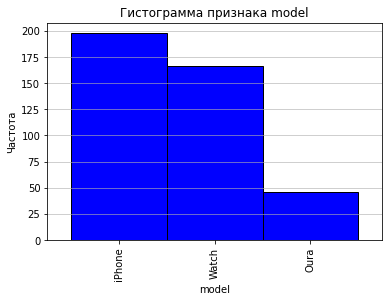

In [20]:
import matplotlib.pyplot as plt

feature = 'model'
df[feature].value_counts().plot(kind='bar', width=1, color='blue', edgecolor = 'black')
plt.title(f'Гистограмма признака {feature}')
plt.xlabel(feature)
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Судя по гистограмме, наименьшее количество информации поступает с устройства Oura.

Для изучения источников, разделим датасет на 3 части - по типу устройства, с которого поступила информация.

In [21]:
df_iphone = df[df['model'] == 'iPhone']
df_watch = df[df['model'] == 'Watch']
df_oura = df[df['model'] == 'Oura']

print('iPhone:')
print(df_iphone.describe())

print('Watch:')
print(df_watch.describe())

print('Oura:')
print(df_oura.describe())

iPhone:
             value
count   198.000000
mean    108.131313
std     230.895988
min       1.000000
25%      10.250000
50%      18.000000
75%      53.750000
max    1089.000000
Watch:
            value
count  166.000000
mean    47.126506
std     75.619876
min      1.000000
25%     11.250000
50%     20.000000
75%     51.750000
max    690.000000
Oura:
           value
count  46.000000
mean   28.565217
std    11.102857
min     1.000000
25%    23.250000
50%    28.000000
75%    34.500000
max    57.000000


Построим графики распределения - в какие дни с устройств поступала информация. Для этого посмотрим, для начала, количество уникальных дат для каждого устройства. Далее построим график 

In [22]:
def len_unique_values_array(df, name):
    print(name, len(df['dateEnd'].unique()))
    
len_unique_values_array(df_iphone, 'iPhone:')
len_unique_values_array(df_watch, 'Watch:')
len_unique_values_array(df_oura, 'Oura:')

iPhone: 142
Watch: 119
Oura: 26


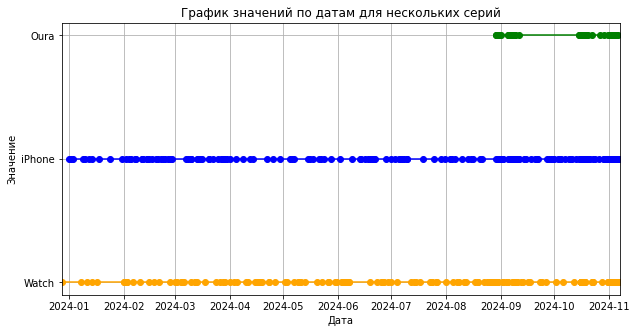

In [23]:
df_copy = df[['model', 'dateEnd']]
df_copy = df_copy.sort_values(by='dateEnd')

df_copy.set_index('dateEnd', inplace=True)

plt.figure(figsize=(10, 5))

series_unique = df_copy['model'].unique()

colors = {'iPhone': 'blue', 'Watch': 'orange', 'Oura': 'green'}

for series in series_unique:
    series_data = df_copy[df_copy['model'] == series]
    plt.plot(series_data.index, series_data['model'], marker='o', label=f'Series {series}', color=colors[series])

plt.xlim(df_copy.index.min(), df_copy.index.max())

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График значений по датам для нескольких серий')
plt.grid()
plt.show()

Информации с устройства Oura значительно меньше + срок его использования меньше чем у смартфона и часов. Остается выбрать одно из устройств - iPhone и Watch.  
Судя по графику значений, есть дни, когда использовалось одно из устройств, и есть дни, когда использвоались оба. Дней, когда в качестве устройства выступал iPhone, больше. 
Исходя из этих размышлений, в качестве основого источника предлагается выбрать устройство iPhone.  
Но есть вопрос - а нельзя ли объединить источники iPhone и Watch, заполнив пропуски в днях?
Можно и нужно! 

# Объединение данных и сбор статистики
Первым делом объединим два источника информации - за основу берем iPhone, "вычитаем" пересекающиеся по датам записи из Watch, получаем более подробынй источник. 

In [24]:
df_iphone_copy = df_iphone.copy()
df_watch_copy = df_watch.copy()

df_watch_filtered = df_watch_copy[~df_watch_copy.set_index(['dateEnd']).index.isin(df_iphone_copy.set_index(['dateEnd']).index)]
result_df = pd.concat([df_watch_filtered, df_iphone])

result_df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart
1,Watch,10.4.0,00:27:49,00:27:47,16,2024-06-03 00:27:49+02:00,2024-06-03 00:27:47+02:00,2024-06-03,2024-06-03
6,Watch,10.4.0,00:27:49,00:27:47,16,2024-06-03 00:27:49+02:00,2024-06-03 00:27:47+02:00,2024-06-03,2024-06-03
11,Watch,10.2.0,16:42:54,16:42:41,10,2024-02-03 16:42:54+01:00,2024-02-03 16:42:41+01:00,2024-02-03,2024-02-03
15,Watch,10.2.0,00:22:33,00:22:30,16,2024-02-01 00:22:33+01:00,2024-02-01 00:22:30+01:00,2024-02-01,2024-02-01
17,Watch,10.2.0,06:53:50,06:44:16,42,2024-02-01 06:53:50+01:00,2024-02-01 06:44:16+01:00,2024-02-01,2024-02-01


In [25]:
result_df = result_df.assign(model='Combined')
result_df.head()
print(len(result_df), len(df_iphone) + len(df_watch))

304 364


Проверим, заполнились ли пропуски.

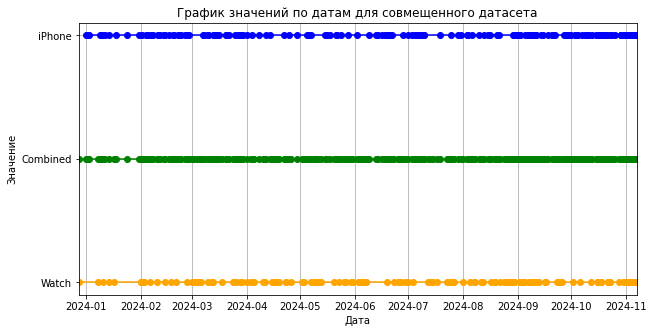

In [26]:
df_copy = pd.concat([result_df[['model', 'dateEnd']], df_iphone[['model', 'dateEnd']], df_watch[['model', 'dateEnd']]])
df_copy = df_copy.sort_values(by='dateEnd')

df_copy.set_index('dateEnd', inplace=True)

plt.figure(figsize=(10, 5))

series_unique = df_copy['model'].unique()

colors = {'iPhone': 'blue', 'Watch': 'orange', 'Combined': 'green'}

for series in series_unique:
    series_data = df_copy[df_copy['model'] == series]
    plt.plot(series_data.index, series_data['model'], marker='o', label=f'Series {series}', color=colors[series])

plt.xlim(df_copy.index.min(), df_copy.index.max())

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График значений по датам для совмещенного датасета')
plt.grid()
plt.show()

Все получилось. Пропусков стало значительно меньше. Далее работаем с фреймом result_df.

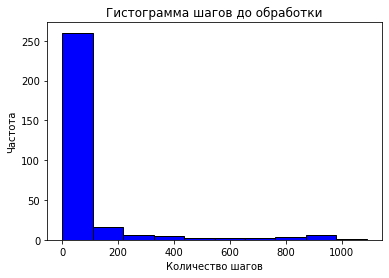

In [27]:
plt.hist(result_df['value'], color='blue', edgecolor='black')
plt.title(f'Гистограмма шагов до обработки')
plt.xlabel('Количество шагов')
plt.ylabel('Частота')
plt.show()

Построили гистограмму для признака value. На данный момент она отражает шаги с учетом всех остановок носителя. Создадим отдельный признак, в котором в секундах будет показано, сколько длилось движение.

In [28]:
result_df['datetimeEnd'] = pd.to_datetime(result_df['datetimeEnd'], utc=True)
result_df['datetimeStart'] = pd.to_datetime(result_df['datetimeStart'], utc=True)
result_df['moveTime'] = (result_df['datetimeEnd'] - result_df['datetimeStart']).dt.total_seconds()
result_df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart,moveTime
1,Combined,10.4.0,00:27:49,00:27:47,16,2024-06-02 22:27:49+00:00,2024-06-02 22:27:47+00:00,2024-06-03,2024-06-03,2.0
6,Combined,10.4.0,00:27:49,00:27:47,16,2024-06-02 22:27:49+00:00,2024-06-02 22:27:47+00:00,2024-06-03,2024-06-03,2.0
11,Combined,10.2.0,16:42:54,16:42:41,10,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,2024-02-03,2024-02-03,13.0
15,Combined,10.2.0,00:22:33,00:22:30,16,2024-01-31 23:22:33+00:00,2024-01-31 23:22:30+00:00,2024-02-01,2024-02-01,3.0
17,Combined,10.2.0,06:53:50,06:44:16,42,2024-02-01 05:53:50+00:00,2024-02-01 05:44:16+00:00,2024-02-01,2024-02-01,574.0


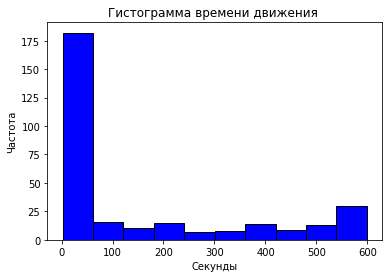

In [29]:
plt.hist(result_df['moveTime'], color = 'blue', edgecolor = 'black')
plt.title(f'Гистограмма времени движения ')
plt.xlabel('Секунды')
plt.ylabel('Частота')
plt.show()

Много строк, где время движения меньше минуты. Будем считать, что остановки до минуты - паузы при ходьбе (ожидание зеленого света на светофоре, к примеру). Создадим новый фрейм, в котором будем хранить объединенные строки из result_df. Объединим те значения, где между концом предыдущего и началом следующего движения прошло меньше 60 секунд.

In [30]:
result_df = result_df.sort_values(by='datetimeEnd')
result_df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart,moveTime
27,Combined,10.2.0,19:08:32,19:01:16,76,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,2023-12-28,2023-12-28,436.0
72,Combined,17.1.2,12:24:22,12:24:20,8,2024-01-01 11:24:22+00:00,2024-01-01 11:24:20+00:00,2024-01-01,2024-01-01,2.0
0,Combined,17.1.2,14:09:58,14:09:53,13,2024-01-02 13:09:58+00:00,2024-01-02 13:09:53+00:00,2024-01-02,2024-01-02,5.0
135,Combined,17.1.2,17:24:58,17:24:52,22,2024-01-03 16:24:58+00:00,2024-01-03 16:24:52+00:00,2024-01-03,2024-01-03,6.0
136,Combined,10.2.0,14:00:58,14:00:32,20,2024-01-08 13:00:58+00:00,2024-01-08 13:00:32+00:00,2024-01-08,2024-01-08,26.0


In [31]:
result_df = result_df.sort_values(by='dateEnd')

result_df['timeFromLastMove'] = (result_df['datetimeStart'] - result_df['datetimeEnd'].shift()).dt.total_seconds() / 60  # Время в минутах
result_df['timeFromLastMove'] = result_df['timeFromLastMove'].fillna(0)

result_df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart,moveTime,timeFromLastMove
27,Combined,10.2.0,19:08:32,19:01:16,76,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,2023-12-28,2023-12-28,436.0,0.000000
72,Combined,17.1.2,12:24:22,12:24:20,8,2024-01-01 11:24:22+00:00,2024-01-01 11:24:20+00:00,2024-01-01,2024-01-01,2.0,5355.800000
0,Combined,17.1.2,14:09:58,14:09:53,13,2024-01-02 13:09:58+00:00,2024-01-02 13:09:53+00:00,2024-01-02,2024-01-02,5.0,1545.516667
135,Combined,17.1.2,17:24:58,17:24:52,22,2024-01-03 16:24:58+00:00,2024-01-03 16:24:52+00:00,2024-01-03,2024-01-03,6.0,1634.900000
136,Combined,10.2.0,14:00:58,14:00:32,20,2024-01-08 13:00:58+00:00,2024-01-08 13:00:32+00:00,2024-01-08,2024-01-08,26.0,6995.566667


Теперь объединим предполагаемые промежутки прерывания ходьбы.

In [32]:
group_condition = (result_df['timeFromLastMove'] <= 60)
result_df['group'] = (group_condition != group_condition.shift()).cumsum()

new_df = result_df.groupby('group').agg({
    'datetimeEnd': 'last',
    'datetimeStart': 'first',
    'value': 'sum',
    'moveTime': 'sum',
    'timeFromLastMove': 'first'
})

new_df.head()

,datetimeEnd,datetimeStart,value,moveTime,timeFromLastMove
group,,,,,
1,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,76,436.0,0.000000
2,2024-02-03 16:00:34+00:00,2024-01-01 11:24:20+00:00,880,2326.0,5355.800000
3,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,10,13.0,-17.883333
4,2024-02-11 12:46:27+00:00,2024-02-04 17:13:59+00:00,740,826.0,1531.083333
5,2024-02-10 23:20:16+00:00,2024-02-10 23:20:13+00:00,18,3.0,-806.233333


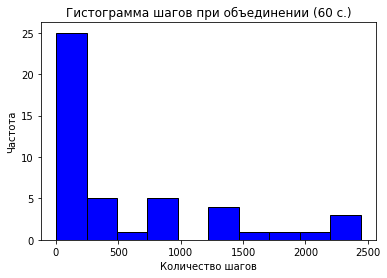

In [33]:
plt.hist(new_df['value'], color = 'blue', edgecolor = 'black')
plt.title(f'Гистограмма шагов при объединении (60 с.)')
plt.xlabel('Количество шагов')
plt.ylabel('Частота')
plt.show()

Статистика с объединением при 60 секундах интересная. Ради интереса посмотрим на объединение при 120 секундах.

In [34]:
group_condition = (result_df['timeFromLastMove'] <= 120)
result_df['group'] = (group_condition != group_condition.shift()).cumsum()

new_df1 = result_df.groupby('group').agg({
    'datetimeEnd': 'last',
    'datetimeStart': 'first',
    'value': 'sum',
    'moveTime': 'sum',
    'timeFromLastMove': 'first'
})

new_df1.head()

,datetimeEnd,datetimeStart,value,moveTime,timeFromLastMove
group,,,,,
1,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,76,436.0,0.000000
2,2024-02-03 16:00:34+00:00,2024-01-01 11:24:20+00:00,880,2326.0,5355.800000
3,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,10,13.0,-17.883333
4,2024-02-11 12:46:27+00:00,2024-02-04 17:13:59+00:00,740,826.0,1531.083333
5,2024-02-10 23:20:16+00:00,2024-02-10 23:20:13+00:00,18,3.0,-806.233333


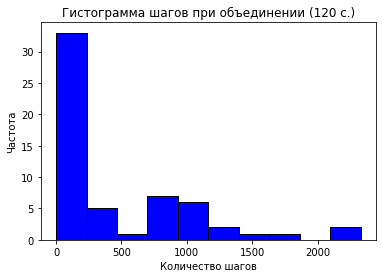

In [35]:
plt.hist(new_df1['value'], color = 'blue', edgecolor = 'black')
plt.title(f'Гистограмма шагов при объединении (120 с.)')
plt.xlabel('Количество шагов')
plt.ylabel('Частота')
plt.show()

Будем считать, что наиболее подходящим интервалом объединения промежутков в один является расстояние между ними не более 60 секунд.

Теперь посмотрим на статистику. Первым делом, попробуем определить часы активности пользователя.

Разделим данные на 24 группы - каждая группа соответствует каждому часу в сутках.

In [36]:
def get_label_from_time(val):
    return val.hour

result_df['activeHour'] = result_df['timeStart'].apply(get_label_from_time)
result_df.head()

,model,operatingSystemVersion,timeEnd,timeStart,value,datetimeEnd,datetimeStart,dateEnd,dateStart,moveTime,timeFromLastMove,group,activeHour
27,Combined,10.2.0,19:08:32,19:01:16,76,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,2023-12-28,2023-12-28,436.0,0.000000,1,19
72,Combined,17.1.2,12:24:22,12:24:20,8,2024-01-01 11:24:22+00:00,2024-01-01 11:24:20+00:00,2024-01-01,2024-01-01,2.0,5355.800000,2,12
0,Combined,17.1.2,14:09:58,14:09:53,13,2024-01-02 13:09:58+00:00,2024-01-02 13:09:53+00:00,2024-01-02,2024-01-02,5.0,1545.516667,2,14
135,Combined,17.1.2,17:24:58,17:24:52,22,2024-01-03 16:24:58+00:00,2024-01-03 16:24:52+00:00,2024-01-03,2024-01-03,6.0,1634.900000,2,17
136,Combined,10.2.0,14:00:58,14:00:32,20,2024-01-08 13:00:58+00:00,2024-01-08 13:00:32+00:00,2024-01-08,2024-01-08,26.0,6995.566667,2,14


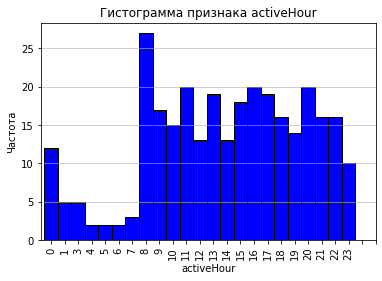

In [37]:
feature = 'activeHour'

result_df[feature].value_counts().sort_index().plot(kind='bar', width=1, color='blue', edgecolor='black')

plt.title(f'Гистограмма признака {feature}')
plt.xlabel(feature)
plt.ylabel('Частота')
plt.xticks(range(0, 25)) 
plt.grid(axis='y', alpha=0.75)
plt.show()

Чаще всего пользователь двигается (встает и совершает некоторое количество шагов) в 8 часов утра.  
Построим аналогичный график, но не для количества движений, а для количества шагов во временные промежутки. 

In [38]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,datetimeEnd,datetimeStart,value,moveTime,timeFromLastMove
0,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,76,436.0,0.000000
1,2024-02-03 16:00:34+00:00,2024-01-01 11:24:20+00:00,880,2326.0,5355.800000
2,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,10,13.0,-17.883333
3,2024-02-11 12:46:27+00:00,2024-02-04 17:13:59+00:00,740,826.0,1531.083333
4,2024-02-10 23:20:16+00:00,2024-02-10 23:20:13+00:00,18,3.0,-806.233333


In [39]:
def get_label_from_datetime(val):
    return val.hour

new_df['activeHour'] = new_df['datetimeStart'].apply(get_label_from_datetime)
new_df.head()

,datetimeEnd,datetimeStart,value,moveTime,timeFromLastMove,activeHour
0,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,76,436.0,0.000000,18
1,2024-02-03 16:00:34+00:00,2024-01-01 11:24:20+00:00,880,2326.0,5355.800000,11
2,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,10,13.0,-17.883333,15
3,2024-02-11 12:46:27+00:00,2024-02-04 17:13:59+00:00,740,826.0,1531.083333,17
4,2024-02-10 23:20:16+00:00,2024-02-10 23:20:13+00:00,18,3.0,-806.233333,23


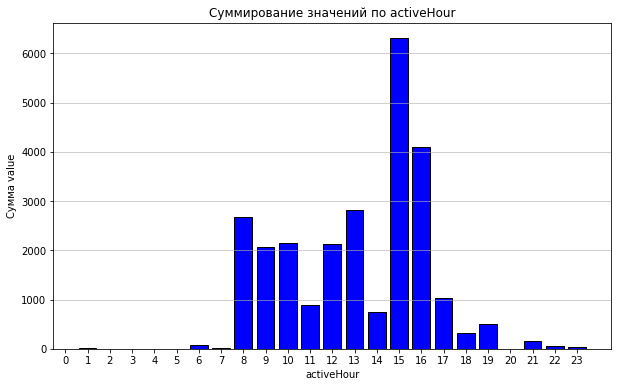

In [40]:
grouped_df = new_df.groupby('activeHour', as_index=False)['value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['activeHour'], grouped_df['value'], color='blue', edgecolor='black')
plt.title('Суммирование значений по activeHour')
plt.xlabel('activeHour')
plt.ylabel('Сумма value')
plt.xticks(range(0, max(grouped_df['activeHour']) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

Хотя и движений было значительно больше в ранние часы, гистограмма по шагам показала, что больше всего шагов делается в послеобеденное время. 

Теперь посмотрим, в какие дни недели пользователь совершает наибольшее количество подъемов и шагов.

In [41]:
def get_weekday_from_datetime(val):
    return val.weekday()

new_df['weekday'] = new_df['datetimeStart'].apply(get_weekday_from_datetime)
new_df.head()

,datetimeEnd,datetimeStart,value,moveTime,timeFromLastMove,activeHour,weekday
0,2023-12-28 18:08:32+00:00,2023-12-28 18:01:16+00:00,76,436.0,0.000000,18,3
1,2024-02-03 16:00:34+00:00,2024-01-01 11:24:20+00:00,880,2326.0,5355.800000,11,0
2,2024-02-03 15:42:54+00:00,2024-02-03 15:42:41+00:00,10,13.0,-17.883333,15,5
3,2024-02-11 12:46:27+00:00,2024-02-04 17:13:59+00:00,740,826.0,1531.083333,17,6
4,2024-02-10 23:20:16+00:00,2024-02-10 23:20:13+00:00,18,3.0,-806.233333,23,5


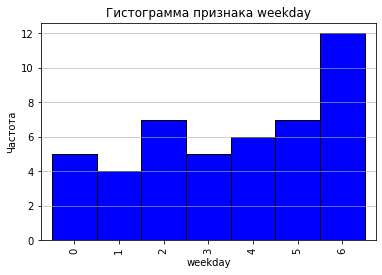

In [42]:
feature = 'weekday'

new_df[feature].value_counts().sort_index().plot(kind='bar', width=1, color='blue', edgecolor='black')

plt.title(f'Гистограмма признака {feature}')
plt.xlabel(feature)
plt.ylabel('Частота')
plt.xticks(range(0, 7)) 
plt.grid(axis='y', alpha=0.75)
plt.show()

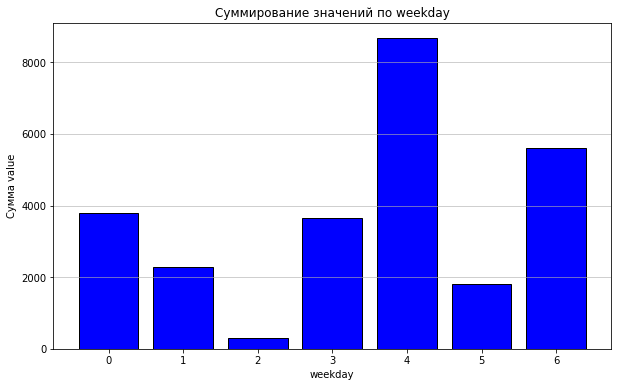

In [43]:
grouped_df = new_df.groupby(feature, as_index=False)['value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(grouped_df[feature], grouped_df['value'], color='blue', edgecolor='black')
plt.title(f'Суммирование значений по {feature}')
plt.xlabel(feature)
plt.ylabel('Сумма value')
plt.xticks(range(0, max(grouped_df[feature]) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

Исходя из графиков, больше всего пользователь совершает шагов по пятницам и воскресеньям. Больше всего подъемов пользователь совершает в воскресенье.